# DSAI 2201 Winter 2024 Assignment

In [1]:
NAME = 'Ahmed Hanif - 60301085'

COLLABORATORS = ""

## Assignment 1 - Data Analysis
**(20 points in total)**

In Assignments part 1 & part 2 we will go through the entire journey of a small data science project.

More details about the dataset can be found in the Kaggle website in the following links: https://www.kaggle.com/datasets/reihanenamdari/breast-cancer

But a modified version of the dataset was attached in the dropbox, please use it to answer this assignment
     



**Question 1.**  _(2 points)_
* A) Analyze the distribution of death events cases among the patients and the race. calculate their respective numbers and percentages.  _(0.5 points)_
* B) Compute descriptive statistics of the data. Comment on the results.  _(0.75 points)_
* C) Analyze the skew and the kurtosis of medical variables distributions(Numbers & Graphs). Comment on the results.  _(0.75  points)_

**Question 2.**  _(2 points)_
* Use univariate plots  to analyze patterns in each of the medical variables with respect to the outcome (death status). What categories of patients( race and marital status) were most likely to die from breast cancer? . (2 points)


**Question 3.**  _(2 points)_
* Use multivariate plots to:
   * A) Analyze the relationship between medical variables. Comment on the results  _(1 points)_
   * B) Identify potential factors that can predict Death event in married patients. Comment on the results.  _(1 points)_

**Question 4.**  _(3 points)_
* Identify and remove any outliers in the medical variables. Explain the rationale for identifying and removing outliers.  _(3 points)_

**Question 5.**  _(3 points)_
* How did you treat missing values for the attributes that you included in the analysis ? Provide a detailed explanation in the comments._(3 points)_

**Question 6.**  _(3 points)_
* The dataset contains  contains alot of zeros, identify which attributes cannot be 0 medically speaking, and impute them, while explaining the rational behind it._(3 points)_


**Question 7.**  _(2 points)_
* Identify the attibutes that will need rescalling ( with explanation ), apply one of the rescalling techniques we have seen in our course and explain your rational. _(2 points)_

**Question 8.**  _(3 points)_
* Through an extensive research, provide additional attributes that you can create that will enhance your dataset, explain the logic behind it, and add them to your data, _(1.5 points)_
* identify the most irrelevant attribute(s), and exclude them from your project for the next steps  _(1.5 points)_

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import scipy

In [3]:
df_verOne = pd.read_csv('Breast_Cancer-Winter2024.csv')

<h1>Start of Data Cleaning</h1>

<h2>Renaming Columns</h2>

In [4]:
df_columns = df_verOne.columns
new_column = []
for column in df_columns:
    column = column.lower().strip().replace(' ', '_')
    new_column.append(column)
df_verOne.columns = new_column
df_verOne.rename(columns = {'t_stage_' : 't_stage', 'reginol_node_positive': 'regional_node_positive'}, inplace = True)
df_columns = df_verOne.columns
df_columns

Index(['age', 'race', 'marital_status', 't_stage', 'n_stage', '6th_stage',
       'differentiate', 'grade', 'a_stage', 'tumor_size', 'estrogen_status',
       'progesterone_status', 'regional_node_examined',
       'regional_node_positive', 'survival_months', 'status'],
      dtype='object')

In [5]:
df_verOne.size

64384

<p>Need to Fix progesterone_status column</p>
<p><b>t_stage</b> is categorical -> Replace with Mode</p>
<b> differentiate </b> is Categorical -> Replace with Mode
<p></p><b> tumor_size and survivor_months</b> is numerical -> Analyze if Data is skewed or not. If Skewed -> Median , else mean</p>

In [6]:
df_verOne.dtypes

age                         int64
race                       object
marital_status             object
t_stage                    object
n_stage                    object
6th_stage                  object
differentiate              object
grade                      object
a_stage                    object
tumor_size                float64
estrogen_status            object
progesterone_status        object
regional_node_examined      int64
regional_node_positive      int64
survival_months           float64
status                     object
dtype: object

In [7]:
df_verOne.isnull().sum()

age                       0
race                      0
marital_status            0
t_stage                   5
n_stage                   0
6th_stage                 0
differentiate             6
grade                     0
a_stage                   0
tumor_size                6
estrogen_status           0
progesterone_status       0
regional_node_examined    0
regional_node_positive    0
survival_months           7
status                    0
dtype: int64

In [8]:
def calculate_bin_edges(column, bin_boundary):
    return np.arange(0,column.max() + bin_boundary, bin_boundary)

<p> Drawing Graphics in order to figure out the distribution</p>
<p> What does the binning do?</p>

/home/ahmedhanifc/miniconda3/envs/learningDSAI/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ahmedhanifc/miniconda3/envs/learningDSAI/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ahmedhanifc/miniconda3/envs/learningDSAI/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='survival_months', ylabel='Count'>

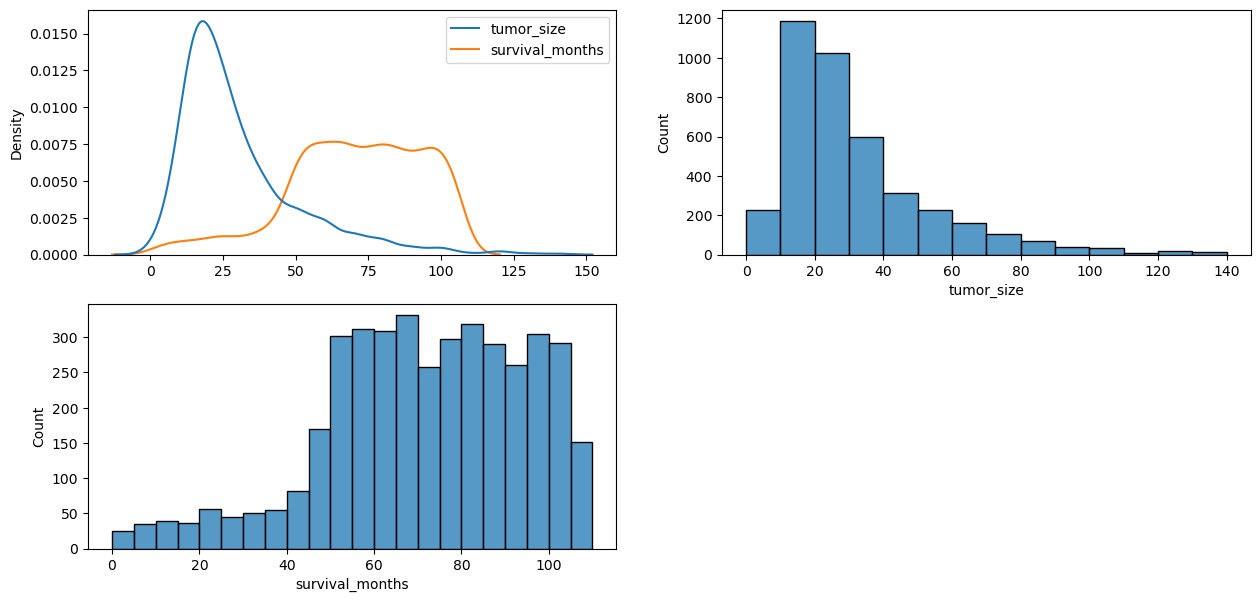

In [9]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sb.kdeplot(df_verOne[['tumor_size','survival_months']]);
plt.subplot(2,2,2)
sb.histplot(df_verOne['tumor_size'], bins = calculate_bin_edges(df_verOne['tumor_size'], 10))
plt.subplot(2,2,3)
sb.histplot(df_verOne['survival_months'], bins = calculate_bin_edges(df_verOne['survival_months'], 5))


<p><b>Data is Skewed in Both Cases, Hence we will be using the median to replace missing values</b></p>

In [10]:
df_verOne.isna().sum()

age                       0
race                      0
marital_status            0
t_stage                   5
n_stage                   0
6th_stage                 0
differentiate             6
grade                     0
a_stage                   0
tumor_size                6
estrogen_status           0
progesterone_status       0
regional_node_examined    0
regional_node_positive    0
survival_months           7
status                    0
dtype: int64

In [11]:
df_verTwo = df_verOne.copy()
df_verTwo_columns = df_verTwo.columns
for column in df_verTwo_columns:
    if (column == 'tumor_size') | (column == 'survival_months'):
        df_verTwo[column].fillna(df_verTwo[column].median(), inplace = True)
    elif (column == 't_stage') | (column == 'differentiate'):
        df_verTwo[column].fillna(df_verTwo[column].mode()[0], inplace = True)

In [12]:
df_verTwo.head()

,age,race,marital_status,t_stage,n_stage,6th_stage,differentiate,grade,a_stage,tumor_size,estrogen_status,progesterone_status,regional_node_examined,regional_node_positive,survival_months,status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4.0,Positive,Positive,24,1,60.0,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35.0,Positive,Positive,14,5,62.0,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63.0,Positive,Positive,14,7,75.0,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18.0,Positive,Positive,2,1,73.0,Alive
4,47,White,Married,T2,N1,IIB,Moderately differentiated,3,Regional,41.0,Positive,Positive,3,1,73.0,Alive


<b>Changing objects into appropriate category dtype </b>
<p> Why?</p>

In [13]:
for dataframe in df_verTwo:
    if(df_verTwo[dataframe].dtype) == 'object':
        df_verTwo[dataframe].astype('category')

In [14]:
# df_verTwo[['status','estrogen_status','progesterone_status','a_stage','differentiate','n_stage','t_stage','marital_status','race']]=df_verTwo[['status','estrogen_status','progesterone_status','a_stage','differentiate','n_stage','t_stage','marital_status','race']].astype('category')

In [15]:
df_verTwo.dtypes

age                         int64
race                       object
marital_status             object
t_stage                    object
n_stage                    object
6th_stage                  object
differentiate              object
grade                      object
a_stage                    object
tumor_size                float64
estrogen_status            object
progesterone_status        object
regional_node_examined      int64
regional_node_positive      int64
survival_months           float64
status                     object
dtype: object

<b> Checking for Duplicates</b>

In [16]:
df_verTwo.duplicated().sum()

1

In [17]:
df_verTwo.drop_duplicates(inplace=True)

In [18]:
df_verTwo.sample()

,age,race,marital_status,t_stage,n_stage,6th_stage,differentiate,grade,a_stage,tumor_size,estrogen_status,progesterone_status,regional_node_examined,regional_node_positive,survival_months,status
1574,66,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,17.0,Positive,Positive,17,2,74.0,Alive


<p><b>Apparently,</b> progesterone_status has some 0 values. Need to convert those into Negative</p>
<p>Found out about this by trying to One Hot Encode it. There was an extra column with the progesterone_status_0 name</p>

In [19]:
df_verTwo['progesterone_status'].replace('0', 'Negative', inplace = True)
df_verTwo['progesterone_status'].value_counts()

progesterone_status
Positive    3321
Negative     702
Name: count, dtype: int64

<h3>Encoding</h2>

<p><b>One Hot Encoding:</b> Performed On Nominal Variables</p>
<p> Converting Categorical Variables into Numerical so I can perform Statistical Analysis on them such as finding total percentage</p>

In [20]:
df_verThree = df_verTwo.copy()
df_verThree = pd.get_dummies(df_verThree, columns = ['status','progesterone_status','estrogen_status'], prefix = ['status','progesterone_status','estrogen_status'])

In [21]:
df_verThree.sample(50)

,age,race,marital_status,t_stage,n_stage,6th_stage,differentiate,grade,a_stage,tumor_size,regional_node_examined,regional_node_positive,survival_months,status_Alive,status_Dead,progesterone_status_Negative,progesterone_status_Positive,estrogen_status_Negative,estrogen_status_Positive
1983,47,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,50.0,18,1,83.0,True,False,False,True,False,True
2440,38,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,2.0,24,2,62.0,True,False,True,False,True,False
1909,50,White,Married,T2,N1,IIB,Well differentiated,1,Regional,40.0,13,1,50.0,True,False,False,True,False,True
1296,49,White,Married,T1,N1,IIA,Well differentiated,1,Regional,18.0,20,1,94.0,True,False,False,True,False,True
3696,54,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,12.0,14,1,68.0,True,False,False,True,False,True
683,46,White,Divorced,T1,N2,IIIA,Moderately differentiated,2,Regional,15.0,9,5,73.0,False,True,False,True,False,True
1063,67,Other,Married,T1,N1,IIA,Poorly differentiated,3,Regional,13.0,19,1,73.0,True,False,True,False,True,False
984,64,Black,Married,T1,N1,IIA,Poorly differentiated,3,Regional,13.0,17,2,84.0,True,False,True,False,True,False
1965,56,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,48.0,3,1,41.0,True,False,False,True,False,True
2462,51,White,Widowed,T2,N3,IIIC,Poorly differentiated,3,Regional,40.0,57,14,51.0,False,True,False,True,False,True


<h1>End of Data Cleaning</h1>

## Q1:

Solution:



<h3> Abbreviations</h3>
<p> wrt => with respect to</p>
<p> r = regardless of</p>

<b> A) Analyze the distribution of death events cases among the patients and the race. calculate their respective numbers and percentages. (0.5 points)<

In [22]:
total_count_wrt_race = df_verThree['race'].value_counts()
total_count_wrt_race

race
White    3412
Other     320
Black     291
Name: count, dtype: int64

In [23]:
death_cases_wrt_race = df_verThree.groupby(['race'])['status_Dead'].sum()
death_cases_wrt_race

race
Black     73
Other     33
White    510
Name: status_Dead, dtype: int64

In [24]:
percentage_of_death_cases_wrt_race = round((death_cases_wrt_race / total_count_wrt_race) * 100,2)
percentage_of_death_cases_wrt_race

race
Black    25.09
Other    10.31
White    14.95
dtype: float64

In [25]:
percentage_of_death_cases_r_race = round(death_cases_wrt_race / total_count_wrt_race * 100,2 )
percentage_of_death_cases_r_race

race
Black    25.09
Other    10.31
White    14.95
dtype: float64

In [26]:
total_count_wrt_race = pd.DataFrame(total_count_wrt_race).rename(columns = {'count':'Total People'})
total_count_wrt_race

,Total People
race,
White,3412
Other,320
Black,291


In [27]:
death_cases_wrt_race = pd.DataFrame(death_cases_wrt_race).rename(columns = {'status_Dead':'Number Of Deaths'})
death_cases_wrt_race

,Number Of Deaths
race,
Black,73
Other,33
White,510


In [28]:
percentage_of_death_cases_wrt_race = pd.DataFrame(percentage_of_death_cases_wrt_race).rename(columns = {0:'Death Percentages'})
percentage_of_death_cases_wrt_race

,Death Percentages
race,
Black,25.09
Other,10.31
White,14.95


<b>B) Compute descriptive statistics of the data. Comment on the results. (0.75 points)</b>

In [29]:
df_verThree.describe()

,age,tumor_size,regional_node_examined,regional_node_positive,survival_months
count,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000
mean,53.969923,30.417350,14.358439,4.158837,71.180711
std,8.963118,21.141177,8.100241,5.109724,23.071310
min,30.000000,0.000000,1.000000,1.000000,0.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


<H3>Description</H3>
<p><b>Age:</b></p>
<p>    The average age of the patients is almost 54 years old. 25% of the patients are below 47 years of age, whereas 75% of the patients are above 61. The Maximum age of the patient is 69</p>
<p><b>tumor_size:</b></p>
<p>    </p>
<p><b>regional_node_examined:</b></p>
<p>    </p>
<p><b>regional_node_positive: </b></p>
<p>    </p>
<p><b>survival_months: </b></p>

<b>C) Analyze the skew and the kurtosis of medical variables distributions(Numbers & Graphs). Comment on the results. (0.75 points)</b>

<h3>Numbers</h3>

In [30]:
medical_numerical_colums = df_verThree.select_dtypes(include=[np.number])
medical_numerical_colums.agg(['skew','kurtosis']).T

,skew,kurtosis
age,-0.219932,-0.754989
tumor_size,1.737863,3.632690
regional_node_examined,0.828885,1.648586
regional_node_positive,2.702183,8.978869
survival_months,-0.612475,0.076445


<h3>Graphs</h3>

In [31]:
tumor_size = df_verThree['tumor_size']
regional_node_examined = df_verThree['regional_node_examined']
regional_node_positive = df_verThree['regional_node_positive']
survival_months = df_verThree['survival_months']

/home/ahmedhanifc/miniconda3/envs/learningDSAI/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ahmedhanifc/miniconda3/envs/learningDSAI/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ahmedhanifc/miniconda3/envs/learningDSAI/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ahmedhanifc/miniconda3/envs/learningDSAI/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: F

Text(0.5, 1.0, 'Hist Plot of Examination of Survival Months')

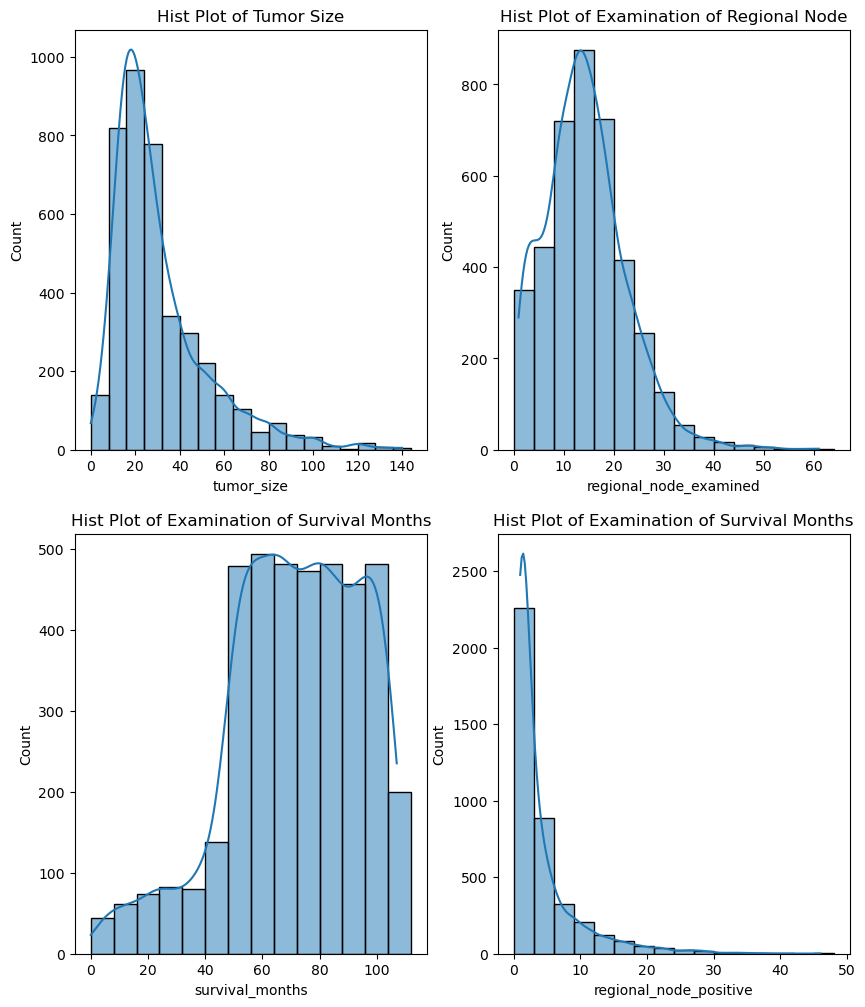

In [32]:
plt.figure(figsize=(10,12))
plt.subplot(2,2,1)
sb.histplot(tumor_size, kde= True, bins = calculate_bin_edges(tumor_size,8));
plt.title('Hist Plot of Tumor Size');

plt.subplot(2,2,2)
sb.histplot(regional_node_examined, kde = True, bins = calculate_bin_edges(regional_node_examined,4))
plt.title('Hist Plot of Examination of Regional Node')

plt.subplot(2,2,3)
sb.histplot(survival_months, kde = True, bins = calculate_bin_edges(survival_months,8))
plt.title('Hist Plot of Examination of Survival Months')

plt.subplot(2,2,4)
sb.histplot(regional_node_positive, kde = True, bins = calculate_bin_edges(regional_node_positive,3))
plt.title('Hist Plot of Examination of Survival Months')

<P> The counts are not equal, so I need to standardize those</P>
<h2> Comments</h2>
<p><b>Tumor Size</b></p>
<p>    </p>
<p><b>Examination of Regional Mode</b></p>
<p>    </p>
<p><b>Positive Result of the Examination</b></p>
<p>    </p>
<p><b>Survival Months</b></p>
<p>    </p>

In [38]:
df_verThree[df_verThree['tumor_size'] == 0]

,age,race,marital_status,t_stage,n_stage,6th_stage,differentiate,grade,a_stage,tumor_size,regional_node_examined,regional_node_positive,survival_months,status_Alive,status_Dead,progesterone_status_Negative,progesterone_status_Positive,estrogen_status_Negative,estrogen_status_Positive
73,66,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,0.0,15,1,98.0,True,False,False,True,False,True
74,67,White,Married,T2,N3,IIIC,Moderately differentiated,2,Regional,0.0,19,16,85.0,True,False,True,False,False,True
75,56,White,Married,T3,N1,IIIA,Moderately differentiated,2,Regional,0.0,13,1,95.0,True,False,False,True,False,True
76,66,White,Single,T2,N2,IIIA,Moderately differentiated,2,Regional,0.0,11,4,79.0,True,False,False,True,False,True
77,42,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,0.0,7,1,106.0,True,False,False,True,False,True
78,51,White,Married,T2,N1,IIB,Well differentiated,1,Regional,0.0,9,1,81.0,True,False,False,True,False,True


###  Q2:
Solution:

<b>Use univariate plots to analyze patterns in each of the medical variables with respect to the outcome (death status). What categories of patients (race and marital status) were most likely to die from breast cancer? . (2 points)</b>

In [ ]:
df_verThree.sample(3)

###  Q3:

<b>Use multivariate plots to:
A) Analyze the relationship between medical variables. Comment on the results (1 points)
B) Identify potential factors that can predict Death event in married patients. Comment on the results. (1 point</b>s)

###  Q4:
Solution:



<b>Identify and remove any outliers in the medical variables. Explain the rationale for identifying and removing outliers. (3 points)</b>

###  Q5:

<b>How did you treat missing values for the attributes that you included in the analysis ? Provide a detailed explanation in the comments.(3 points)</b>

###  Q6:

<b>The dataset contains contains alot of zeros, identify which attributes cannot be 0 medically speaking, and impute them, while explaining the rational behind it.(3 points)</b>

###  Q7:

<b>Identify the attibutes that will need rescalling ( with explanation ), apply one of the rescalling techniques we have seen in our course and explain your rational. (2 points)</b>

###  Q8 :
Solution


<b>Through an extensive research, provide additional attributes that you can create that will enhance your dataset, explain the logic behind it, and add them to your data, (1.5 points)
identify the most irrelevant attribute(s), and exclude them from your project for the next steps (1.5 points)<b>

# Assignment 2 - Machine Learning Models for Prediction
**(15 points total)**

 
* In **Assignment 1**, we have explored the data, cleaned up the data, modified features, and created new ones. 
* In **Assignment 2**, we will apply supervised machine learning models for classification and regression, evaluate its perofrmance, and identify the best models to solve the following problems: 

    * The **classification problem** is: given a train dataset of patients who survived or did not survive, build a model which can determine based on a given test dataset not containing the death event information information, if these patients in the test dataset survived or not. 

    * The **regression problem** is: predict the number of months that remains for the survival of the patient.



**Question 1. (Data preparation)**  _(2 points)_
* List the relevant features which you will use for classification and explain your answer (*a relevant feature is a feature that can have an impact on the chance of survival of the patient*).
* List the relevant features which you will use for regression and explain your answer (*a relevant feature is a feature that can have an impact on the prediction of the number of remaining survival months of the patient*).
* Divide both your datasets into a training set (70%) and a testing set (30%). All models will be trained and tested on the same splits.
    





###  Data Preparation & Spliting for the Classification Model

###  Data Preparation & Spliting for the Regression Model

**Question 2. (Classification models)**  _(3 points)_
* Train three different classification models of your choice using the training set. Explain the rationale behind selecting each of these three algorithms. You may refer to the following guidlines for model selection: 
    * Diagram from scikit-learn: https://scikit-learn.org/stable/tutorial/machine_learning_map/
    * Models comparison table: https://docs.google.com/spreadsheets/d/16i47Wmjpj8k-mFRk-NnXXU5tmSQz8h37YxluDV8Zy9U/edit#gid=0



**Question 3. (Evaluation of classification models)**  _(3 points)_
* Evaluate the performance of your three classification models on the testing set using the following metrics: accuracy, area under the curve (AUC), precision, and recall.
* Based on the models evaluation results, what is the best model and why?




**Question 4. (Regression models)**  _(3 points)_
* Train two different regression models of your choice using the training set. Explain the rationale behind selecting each of these two algorithms. 



**Question 5. (Evaluation of regression models)**  _(3 points)_
* Evaluate the performance of your two regression models on the testing set using the following metrics: mean absolute error,mean squared error, and R-square.
* Based on the models evaluation results, what is the best model and why?



**Question 6. (Possible improvements)** _(1 points)_
* How can you improve the accuracy of your classification model?
* How can you improve the accuracy of your regression model?

<h1>References</h1>

<p>
    GfG. (2020, December 11). How to reset index after Groupby pandas? GeeksforGeeks. https://www.geeksforgeeks.org/how-to-reset-index-after-groupby-pandas/
    
</p>